In [0]:
from torch.optim.lr_scheduler import ReduceLROnPlateau, StepLR
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
from torch import nn
from torchvision import transforms
import torch.nn.functional as F
from torch import optim
import numpy as np
from tqdm import tnrange, tqdm_notebook
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt


##Exercise 2

Approximating continious finctions with 2 layer NN

[[0]
 [1]] [[0.5       ]
 [0.73105858]]
Number of layers:
4


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


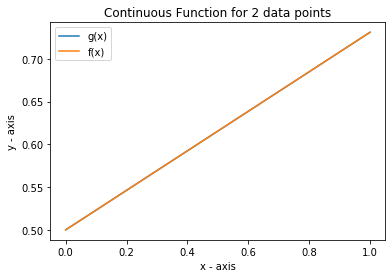

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of layers:
4


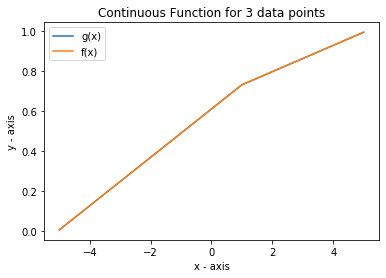

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Number of layers:
4


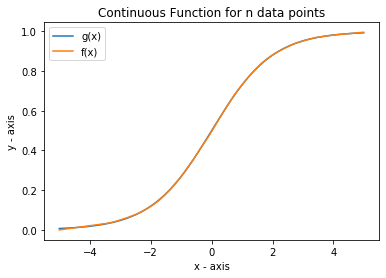

<Figure size 432x288 with 0 Axes>

In [35]:
# Generating continious values

# This function generates continuous values
# Define the function that we want as the "input"
# This is g(x)
def generate_continuous_values(x):
    '''define the function that you want as input'''
    return 1/(1 + np.exp(-x))

def call_to_g_of_x(input, g_of_x):
    result = g_of_x(input)
    return result

# Part a - Two data points
def get_two_data_points(point_1, point_2):
    x = [point_1, point_2]
    x = np.asarray(x)
    x.shape = (len(x), 1)
    y = np.array([call_to_g_of_x(x[i], generate_continuous_values) for i in range(len(x))])
    y.shape = (len(y), 1)
    return x, y


# Part b - Three data points
def get_three_data_points(point_1, point_2, point_3):
    x = [point_1, point_2, point_3]
    x = np.asarray(x)
    x.shape = (len(x), 1)
    y = np.array([call_to_g_of_x(x[i], generate_continuous_values) for i in range(len(x))])
    y.shape = (len(y), 1)
    return x, y


# Part c - n data points
def get_n_data_points(start, end, step_size):
    x = np.arange(start, end, step_size)
    x.shape = (len(x), 1)
    y = np.array([call_to_g_of_x(x[i], generate_continuous_values) for i in range(len(x))])
    y.shape = (len(y), 1)
    return x, y




# Design of Neural Network

# Neural Network for 2 data-points
# MLPRegressor uses ReLu activation by default
def get_model_task1():
    neural_network = MLPRegressor(hidden_layer_sizes = (64, 32), activation='relu', solver = 'lbfgs', learning_rate_init = 0.001, max_iter = 500, verbose = False)
    return neural_network

# Neural Network for 3 data-points
def get_model_task2():
    neural_network = MLPRegressor(hidden_layer_sizes = (64, 32), activation='relu', solver = 'lbfgs', learning_rate_init = 0.001, max_iter = 500, verbose = False)
    return neural_network

# Neural Network for n data-points
def get_model_task3():
    neural_network = MLPRegressor(hidden_layer_sizes =(512, 256), activation='relu', solver='lbfgs', learning_rate_init = 0.001, batch_size = 5, max_iter = 500, verbose = False)
    return neural_network






# Generate continous function
x_1, y_1 = get_two_data_points(0, 1)
x_2, y_2 = get_three_data_points(-5, 1, 5) #function call for part 2 data prep
x_3, y_3 = get_n_data_points(-5, 5, .01) #function call for part 3 data prep












# Biuld and fit model for part 1
neural_network = get_model_task3()
print(x_1, y_1)
neural_network.fit(x_1, y_1)
'''
print("TASK 1 MODEL SUMMARY AND WEIGHTS---")
print("Weights:")
print(neural_network.coefs_) #print WEIGHTS
'''
print("Number of layers:")
print(neural_network.n_layers_) #prints number of layers
'''
print("Bias:")
print(neural_network.intercepts_) #prints the BIAS
'''
#weights = neural_network.coefs_
#for i in range(len(weights)):
#    print("Layer " + str(i) + ":" + str(len(weights[i])) + " nodes")

predictions = neural_network.predict(x_1)

plt.title("Continuous Function for 2 data points")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(x_1, y_1, label = 'g(x)')
plt.plot(x_1, predictions, label = 'f(x)')
plt.legend()
plt.show()
plt.savefig("task1.png")
plt.clf()











# Build and fit model for part 2
neural_network = get_model_task3()
neural_network.fit(x_2, y_2)
'''
print("TASK 2 MODEL SUMMARY AND WEIGHTS---")
print("Weights:")
print(neural_network.coefs_)
'''
# Total 4 layes : input, 2 hidden layers and one output layer
print("Number of layers:")
print(neural_network.n_layers_) #prints number of layers
'''
print("Bias:")
print(neural_network.intercepts_)
'''
#weights = neural_network.coefs_
#for i in range(len(weights)):
#    print("Layer " + str(i) + ":" + str(len(weights[i])) + " nodes")

predictions = neural_network.predict(x_2)

plt.title("Continuous Function for 3 data points")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(x_2, y_2, label = 'g(x)')
plt.plot(x_2, predictions, label = 'f(x)')
plt.legend()
plt.savefig("task2.png")
plt.show()

plt.clf()


# Build and fit model for Part 3
neural_network = get_model_task3()
neural_network.fit(x_3, y_3)
'''
print("TASK 3 MODEL SUMMARY AND WEIGHTS---")
print("Weights:")
print(neural_network.coefs_) #print WEIGHTS
'''
print("Number of layers:")
print(neural_network.n_layers_) #prints number of layers
'''
print("Bias:")
print(neural_network.intercepts_) #prints the BIAS
'''
#weights = neural_network.coefs_
#for i in range(len(weights)):
#    print("Layer " + str(i) + ":" + str(len(weights[i])) + " nodes")

predictions = neural_network.predict(x_3)

plt.title("Continuous Function for n data points")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.plot(x_3, y_3, label = 'g(x)')
plt.plot(x_3, predictions, label = 'f(x)')
plt.legend()
plt.savefig("task3.png")
plt.show()

plt.clf()

##Exercise 3

**4-CNN MODEL**: We are uing a model with 4 layers of Convolutions with Batch Normalization and Dropout, followed by two fully connected layers. Along with Data Augumentation, we acheive an accuracy of 93.1%


In [77]:
epochs=35
batch_size=256
learning_rate=0.001
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

#prep dataset
trans = transforms.Compose([
                            #transforms.RandomCrop(28, padding=4),
                            #transforms.RandomRotation(degrees=(15,-15)),
                            transforms.RandomHorizontalFlip(p=0.5),
                            transforms.RandomPerspective(distortion_scale=0.2, p=0.2),
                            transforms.ToTensor(), 
                            transforms.Normalize((0.3536915,), (0.3907847,)),
                            ])
trans1 = transforms.Compose([ 
                            transforms.ToTensor(), 
                            transforms.Normalize((0.3536915,), (0.3907847,)),
                            ])
training_set = datasets.FashionMNIST('data', train=True, download=True, transform=trans)
testing_set = datasets.FashionMNIST('data', train=False, download=True, transform=trans1)
train_data = DataLoader(training_set, shuffle=True, batch_size=batch_size)
test_data = DataLoader(testing_set, shuffle=False, batch_size=batch_size)



#model definition
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, stride=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        #nn.Dropout(0.2),
        nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        #nn.Dropout(0.2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.2),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=2),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Dropout(0.2),
    )

    self.fc1 = nn.Sequential(
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.2)
    )

    self.fc2 = nn.Linear(64, 10)
    

  def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
      out = out.reshape(out.size(0), -1)
      out = self.fc1(out)
      out = self.fc2(out)
      return out


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        torch.nn.init.zeros_(m.bias)


net = CNN()
if torch.cuda.is_available():
    net = CNN().cuda()    
net.apply(weights_init)
cal_loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)
#scheduler = ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10, verbose=True, min_lr = 0.0001)

print(net)


CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.2, inplace=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, af

In [78]:
###training the model

train_acc = list()
train_loss_list = list()
test_acc = list()
test_loss_list = list()
lr_list = list()

for epoch in tnrange(1, epochs+1):
    print ("Epoch {}".format(epoch))
    running_loss = 0
    training_accuracy = 0
    net.train()
    for img, lbl in tqdm_notebook(train_data):
        img, lbl = img.to(device), lbl.to(device)
        optimizer.zero_grad()
        score = net(img)
        loss = cal_loss(score, lbl)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().cpu().numpy()
        training_accuracy += (score.argmax(dim=1)==lbl).sum().cpu().numpy()
    #scheduler.step(0)
    print('LR = ', optimizer.param_groups[0]['lr'])

    test_running_loss = 0
    test_accuracy = 0
    net.eval()
    with torch.no_grad():
        for img,lbl in test_data:
            img,lbl = img.to(device), lbl.to(device)
            score = net(img)
            loss = cal_loss(score, lbl)
            test_running_loss += loss.detach().cpu().numpy()
            test_accuracy += (score.argmax(dim=1)==lbl).sum().cpu().numpy()

    train_loss = running_loss/len(train_data)
    test_loss = test_running_loss/len(test_data)
    training_accuracy /= len(training_set)
    test_accuracy /= len(testing_set)
    train_acc.append(training_accuracy)
    train_loss_list.append(train_loss)
    test_acc.append(test_accuracy)
    test_loss_list.append(test_loss)
    lr_list.append(optimizer.param_groups[0]['lr'])

    print('    loss     (train, test): {:.4f},  {:.4f}'.format(train_loss, test_loss))
    print('    accuracy (train, test): {:.4f},  {:.4f}'.format(training_accuracy, test_accuracy)) 
    
    if epoch in [13, 18, 21, 23, 25, 27, 39, 30, 31]:
        optimizer.param_groups[0]['lr'] = optimizer.param_groups[0]['lr']/2


Epoch 1


LR =  0.01
    loss     (train, test): 0.5872,  0.3897
    accuracy (train, test): 0.7842,  0.8606
Epoch 2


LR =  0.01
    loss     (train, test): 0.3833,  0.3364
    accuracy (train, test): 0.8601,  0.8774
Epoch 3


LR =  0.01
    loss     (train, test): 0.3460,  0.2891
    accuracy (train, test): 0.8763,  0.8973
Epoch 4


LR =  0.01
    loss     (train, test): 0.3189,  0.2816
    accuracy (train, test): 0.8849,  0.8981
Epoch 5


LR =  0.01
    loss     (train, test): 0.3038,  0.2848
    accuracy (train, test): 0.8918,  0.8961
Epoch 6


LR =  0.01
    loss     (train, test): 0.2876,  0.2628
    accuracy (train, test): 0.8979,  0.9040
Epoch 7


LR =  0.01
    loss     (train, test): 0.2809,  0.2619
    accuracy (train, test): 0.8990,  0.9066
Epoch 8


LR =  0.01
    loss     (train, test): 0.2739,  0.2562
    accuracy (train, test): 0.9008,  0.9026
Epoch 9


LR =  0.01
    loss     (train, test): 0.2633,  0.2506
    accuracy (train, test): 0.9049,  0.9052
Epoch 10


LR =  0.01
    loss     (train, test): 0.2576,  0.2420
    accuracy (train, test): 0.9075,  0.9104
Epoch 11


LR =  0.01
    loss     (train, test): 0.2547,  0.2500
    accuracy (train, test): 0.9071,  0.9086
Epoch 12


LR =  0.01
    loss     (train, test): 0.2472,  0.2568
    accuracy (train, test): 0.9109,  0.9051
Epoch 13


LR =  0.01
    loss     (train, test): 0.2448,  0.2350
    accuracy (train, test): 0.9123,  0.9114
Epoch 14


LR =  0.005
    loss     (train, test): 0.2213,  0.2123
    accuracy (train, test): 0.9196,  0.9201
Epoch 15


LR =  0.005
    loss     (train, test): 0.2142,  0.2143
    accuracy (train, test): 0.9216,  0.9202
Epoch 16


LR =  0.005
    loss     (train, test): 0.2123,  0.2192
    accuracy (train, test): 0.9227,  0.9176
Epoch 17


LR =  0.005
    loss     (train, test): 0.2102,  0.2054
    accuracy (train, test): 0.9234,  0.9218
Epoch 18


LR =  0.005
    loss     (train, test): 0.2069,  0.2121
    accuracy (train, test): 0.9250,  0.9205
Epoch 19


LR =  0.0025
    loss     (train, test): 0.1941,  0.2070
    accuracy (train, test): 0.9281,  0.9256
Epoch 20


LR =  0.0025
    loss     (train, test): 0.1908,  0.2006
    accuracy (train, test): 0.9315,  0.9284
Epoch 21


LR =  0.0025
    loss     (train, test): 0.1869,  0.1981
    accuracy (train, test): 0.9312,  0.9277
Epoch 22


LR =  0.00125
    loss     (train, test): 0.1822,  0.1949
    accuracy (train, test): 0.9345,  0.9305
Epoch 23


LR =  0.00125
    loss     (train, test): 0.1804,  0.1956
    accuracy (train, test): 0.9343,  0.9294
Epoch 24


LR =  0.000625
    loss     (train, test): 0.1754,  0.1950
    accuracy (train, test): 0.9355,  0.9294
Epoch 25


LR =  0.000625
    loss     (train, test): 0.1744,  0.1928
    accuracy (train, test): 0.9367,  0.9307
Epoch 26


LR =  0.0003125
    loss     (train, test): 0.1730,  0.1925
    accuracy (train, test): 0.9369,  0.9302
Epoch 27


LR =  0.0003125
    loss     (train, test): 0.1710,  0.1935
    accuracy (train, test): 0.9378,  0.9304
Epoch 28


LR =  0.00015625
    loss     (train, test): 0.1696,  0.1923
    accuracy (train, test): 0.9379,  0.9299
Epoch 29


LR =  0.00015625
    loss     (train, test): 0.1697,  0.1930
    accuracy (train, test): 0.9385,  0.9316
Epoch 30


LR =  0.00015625
    loss     (train, test): 0.1686,  0.1925
    accuracy (train, test): 0.9387,  0.9318
Epoch 31


LR =  7.8125e-05
    loss     (train, test): 0.1683,  0.1924
    accuracy (train, test): 0.9392,  0.9314
Epoch 32


LR =  3.90625e-05
    loss     (train, test): 0.1690,  0.1920
    accuracy (train, test): 0.9389,  0.9320
Epoch 33


LR =  3.90625e-05
    loss     (train, test): 0.1693,  0.1919
    accuracy (train, test): 0.9391,  0.9313
Epoch 34


LR =  3.90625e-05
    loss     (train, test): 0.1668,  0.1917
    accuracy (train, test): 0.9386,  0.9318
Epoch 35


LR =  3.90625e-05
    loss     (train, test): 0.1671,  0.1924
    accuracy (train, test): 0.9383,  0.9310


In [0]:
 torch.save(my_net.state_dict(), 'my_net')


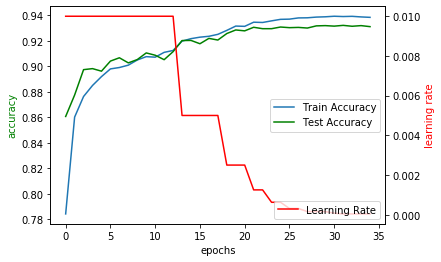

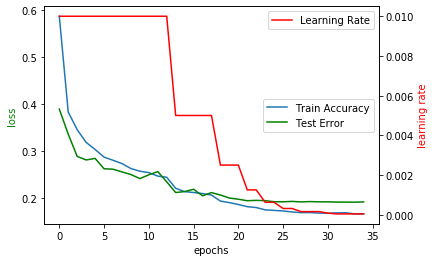

In [79]:


fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs')
ax1.plot(pd.Series(train_acc), label='Train Accuracy')
ax1.plot(pd.Series(test_acc), color='green', label='Test Accuracy')
ax1.set_ylabel('accuracy', color='green')
ax2 = ax1.twinx()
ax2.plot(pd.Series(lr_list), color='r', label='Learning Rate')
ax2.set_ylabel('learning rate', color='r')
ax1.legend(loc=7)
ax2.legend(loc=4)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_xlabel('epochs')
ax1.plot(pd.Series(train_loss_list), label='Train Accuracy')
ax1.plot(pd.Series(test_loss_list), color='green', label='Test Error')
ax1.set_ylabel('loss', color='green')
ax2 = ax1.twinx()
ax2.plot(pd.Series(lr_list), color='r', label='Learning Rate')
ax2.set_ylabel('learning rate', color='r')
ax1.legend(loc=7)
ax2.legend(loc=1)
